In [1]:
import pandas as pd
import numpy as np
from numpy import where
import collections
from collections import Counter
import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

In [47]:
#Import the dataset
ush15=pd.read_csv('/Users/mac/Desktop/TFG/data/tables/US/household/2015/ahs2015n.csv')

In [48]:
#Check the column names of my data
for col in ush15.columns:
    print(col)

CONTROL
TOTROOMS
PERPOVLVL
JACPRIMARY
JACSECNDRY
JADEQUACY
JARTACCESS
JARTATTRACT
JARTAWARE
JARTECON
JARTIDENT
JARTIMPROVE
JARTJOBS
JARTNEARBY
JARTSATIS
JARTSOC
JASTH1MED
JASTH2MED
JASTHEMR
JASTHMA
JBATHEXCLU
JBATHROOMS
JBEDROOMS
JBLD
JCHEMSTOR
JCOLD
JCOLDCOST
JCOLDEQ
JCOLDEQFREQ
JCOLDHTCAP
JCOLDINSUL
JCOLDOTHER
JCOLDUTIL
JCONDO
JCOOKFUEL
JCOOKTYPE
JCROPSL
JDINING
JDISHH
JDISHWASH
JDRYER
JDWNPAYPCT
JELECAMT
JENTRYSYS
JEXTCORD
JFINCP
JFINROOMS
JFIREPLACE
JFIRSTHOME
JFLOORHOLE
JFNDCRUMB
JFOUNDTYPE
JFRIDGE
JFS
JFSAFFORD
JFSEATLESS
JFSHUNGRY
JFSLAST
JFSLOSTWGT
JFSMEALDAYS
JFSNODAYS
JFSNOFOOD
JFSSKIPMEAL
JFSSTATUS
JFSWORRY
JFUSEBLOW
JGARAGE
JGASAMT
JGRANDHH
JGUTREHB
JHCAMT
JHCAVICE
JHCHELP
JHCOORR
JHCOWNBUY
JHCOWNCON
JHCOWNFORE
JHCOWNOTH
JHCOWNREFI
JHCPAY
JHCRENTEVIC
JHCRENTFAIR
JHCRENTLLRD
JHCRENTNGH
JHCRENTOTH
JHEATFUEL
JHEATTYPE
JHHADLTKIDS
JHHAGE
JHHCARE
JHHCITSHP
JHHERRND
JHHGRAD
JHHHEAR
JHHINUSYR
JHHMAR
JHHMEMRY
JHHMOVE
JHHNATVTY
JHHOLDKIDS
JHHRACE
JHHRACEAS
JHHRACEPI
JHHSEE
JHHSEX
JH

In [49]:
#Select the variables which are relevant for the study
var15=ush15[['JBLD','JGARAGE','JPORCH','JBATHEXCLU','JBATHROOMS','JBEDROOMS','JDINING','JKITCHENS','JKITEXCLU','JTOTROOMS','JUNITFLOORS','JUNITSIZE','JADEQUACY','JUPKEEP','JHSHLDTYPE','JHHGRAD','JHHRACE','JFINCP','JHINCP','JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH']]
var15

,JBLD,JGARAGE,JPORCH,JBATHEXCLU,JBATHROOMS,JBEDROOMS,JDINING,JKITCHENS,JKITEXCLU,JTOTROOMS,...,JHHGRAD,JHHRACE,JFINCP,JHINCP,JPERPOVLVL,JNEARABAND,JNEARBARCL,JNEARTRASH,JRATINGHS,JRATINGNH
0,'0','0','0','0','0','0','0','0','0','1',...,'0','0','0','1','0','0','0','0','0','0'
1,'0','0','0','0','0','0','0','0','0','1',...,'0','0','0','1','0','0','0','0','0','0'
2,'0','0','0','0','0','0','0','0','0','0',...,'2','0','0','1','0','0','0','0','0','0'
3,'0','0','0','0','0','0','0','0','0','1',...,'0','0','1','1','0','0','0','0','0','0'
4,'0','0','0','0','0','0','0','0','0','0',...,'0','0','2','3','0','0','0','0','0','0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69488,'0','0','0','0','0','0','0','0','0','0',...,'0','0','0','1','0','0','0','0','0','0'
69489,'0','0','0','0','0','0','0','0','0','1',...,'0','0','0','1','0','0','0','0','0','0'
69490,'0','0','0','0','0','0','0','0','0','1',...,'0','0','0','1','0','0','0','0','0','0'
69491,'0','0','0','0','0','0','0','0','0','0',...,'0','2','0','1','0','0','0','0','0','0'


In [50]:
#Clean the dataset to keep just the numerical data
var15 = var15.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))

print(var15)

/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_90868/3948759096.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  var15 = var15.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))


       JBLD  JGARAGE  JPORCH  JBATHEXCLU  JBATHROOMS  JBEDROOMS  JDINING  \
0         0        0       0           0           0          0        0   
1         0        0       0           0           0          0        0   
2         0        0       0           0           0          0        0   
3         0        0       0           0           0          0        0   
4         0        0       0           0           0          0        0   
...     ...      ...     ...         ...         ...        ...      ...   
69488     0        0       0           0           0          0        0   
69489     0        0       0           0           0          0        0   
69490     0        0       0           0           0          0        0   
69491     0        0       0           0           0          0        0   
69492     0        0       0           0           0          0        0   

       JKITCHENS  JKITEXCLU  JTOTROOMS  ...  JHHGRAD  JHHRACE  JFINCP  JHINCP  \
0     

In [51]:
#check columns which appear to have only 0s; no valuable data 
var15[['JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH','JGARAGE','JBATHEXCLU']].value_counts()

JPERPOVLVL  JNEARABAND  JNEARBARCL  JNEARTRASH  JRATINGHS  JRATINGNH  JGARAGE  JBATHEXCLU
0           0           0           0           0          0          0        0             69493
dtype: int64

In [52]:
#drop them
var15.drop(['JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH','JGARAGE','JBATHEXCLU'], axis=1, inplace=True)

In [53]:
#Check for null values
null_counts = var15.isna().sum()
print(null_counts)

JBLD           0
JPORCH         0
JBATHROOMS     0
JBEDROOMS      0
JDINING        0
JKITCHENS      0
JKITEXCLU      0
JTOTROOMS      0
JUNITFLOORS    0
JUNITSIZE      0
JADEQUACY      0
JUPKEEP        0
JHSHLDTYPE     0
JHHGRAD        0
JHHRACE        0
JFINCP         0
JHINCP         0
dtype: int64


In [54]:
#Look at some description of the data
print(var15.describe())

               JBLD        JPORCH    JBATHROOMS     JBEDROOMS       JDINING  \
count  69493.000000  69493.000000  69493.000000  69493.000000  69493.000000   
mean       0.061906      0.006231      0.041573      0.028032      0.038709   
std        0.345217      0.078690      0.325902      0.235113      0.275537   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        3.000000      1.000000      3.000000      2.000000      2.000000   

          JKITCHENS     JKITEXCLU     JTOTROOMS   JUNITFLOORS     JUNITSIZE  \
count  69493.000000  69493.000000  69493.000000  69493.000000  69493.000000   
mean       0.023398      0.008648      0.497978      0.006029      0.000014   
std        0.215056      0.092594      0.600837    

In [55]:
#Check variable types
var15.dtypes

JBLD           int64
JPORCH         int64
JBATHROOMS     int64
JBEDROOMS      int64
JDINING        int64
JKITCHENS      int64
JKITEXCLU      int64
JTOTROOMS      int64
JUNITFLOORS    int64
JUNITSIZE      int64
JADEQUACY      int64
JUPKEEP        int64
JHSHLDTYPE     int64
JHHGRAD        int64
JHHRACE        int64
JFINCP         int64
JHINCP         int64
dtype: object

                 JBLD    JPORCH  JBATHROOMS  JBEDROOMS   JDINING  JKITCHENS  \
JBLD         1.000000  0.052546    0.026624   0.025780  0.022613   0.030498   
JPORCH       0.052546  1.000000    0.406814   0.395016  0.401692   0.425059   
JBATHROOMS   0.026624  0.406814    1.000000   0.868965  0.763459   0.819299   
JBEDROOMS    0.025780  0.395016    0.868965   1.000000  0.750045   0.797570   
JDINING      0.022613  0.401692    0.763459   0.750045  1.000000   0.770568   
JKITCHENS    0.030498  0.425059    0.819299   0.797570  0.770568   1.000000   
JKITEXCLU    0.370409  0.122953    0.156895   0.147505  0.139166   0.147376   
JTOTROOMS   -0.078903  0.230820    0.453304   0.472043  0.547819   0.438818   
JUNITFLOORS  0.001966  0.302251    0.312909   0.298968  0.286019   0.330555   
JUNITSIZE   -0.000680  0.047907   -0.000484  -0.000452 -0.000533  -0.000413   
JADEQUACY   -0.128707 -0.029051   -0.045738  -0.030250 -0.035911  -0.031952   
JUPKEEP      0.014630  0.303558    0.485535   0.4642

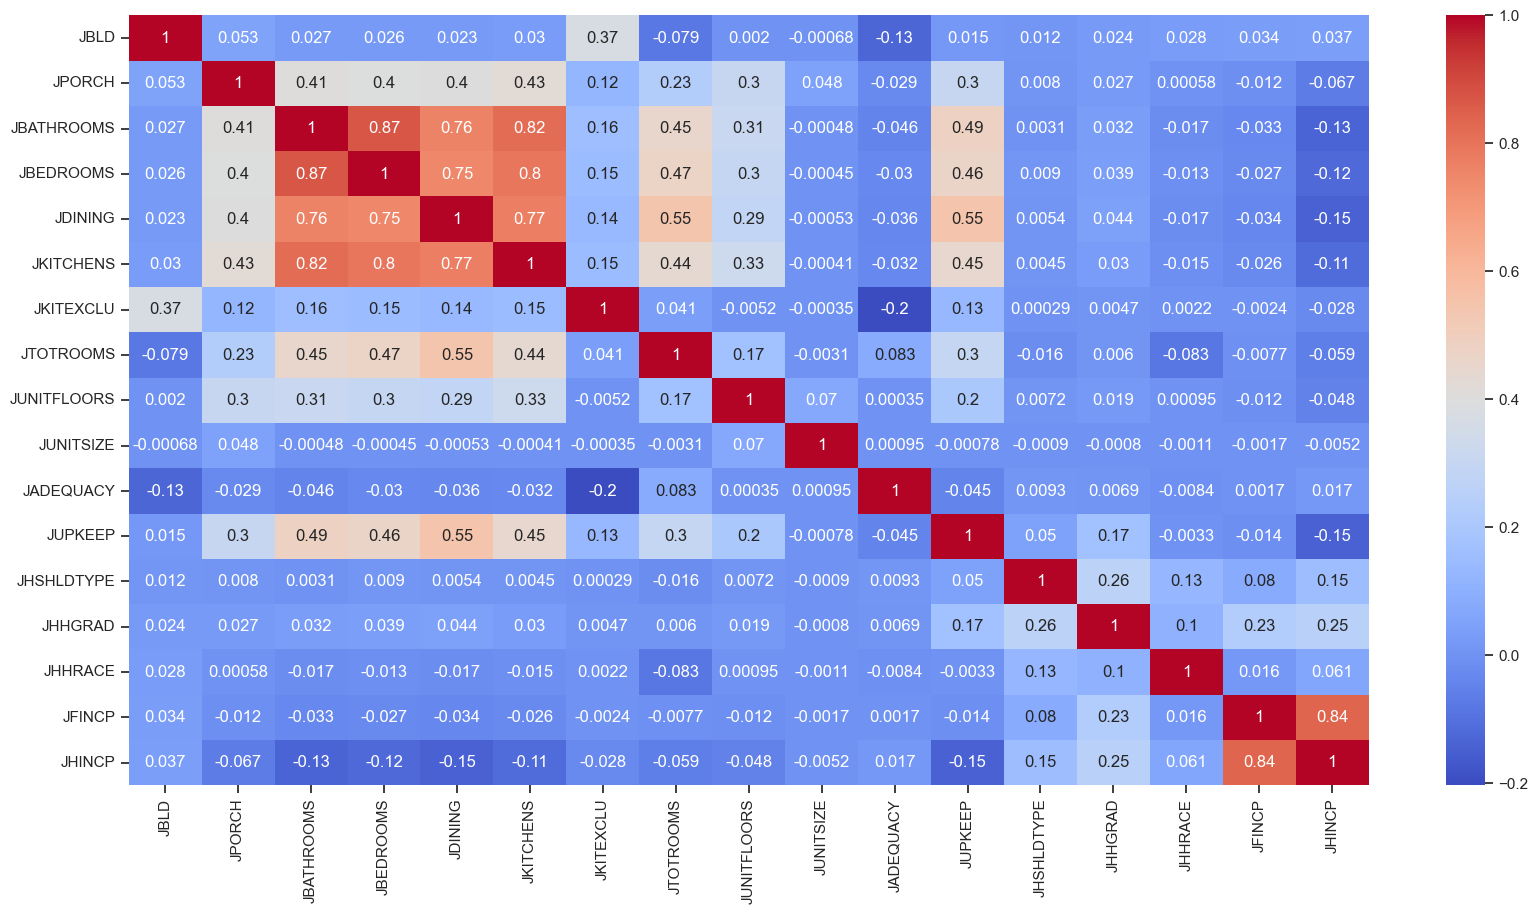

In [56]:
#Explore the correlation
print(var15.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(var15.corr(), annot=True, cmap='coolwarm')
plt.show()

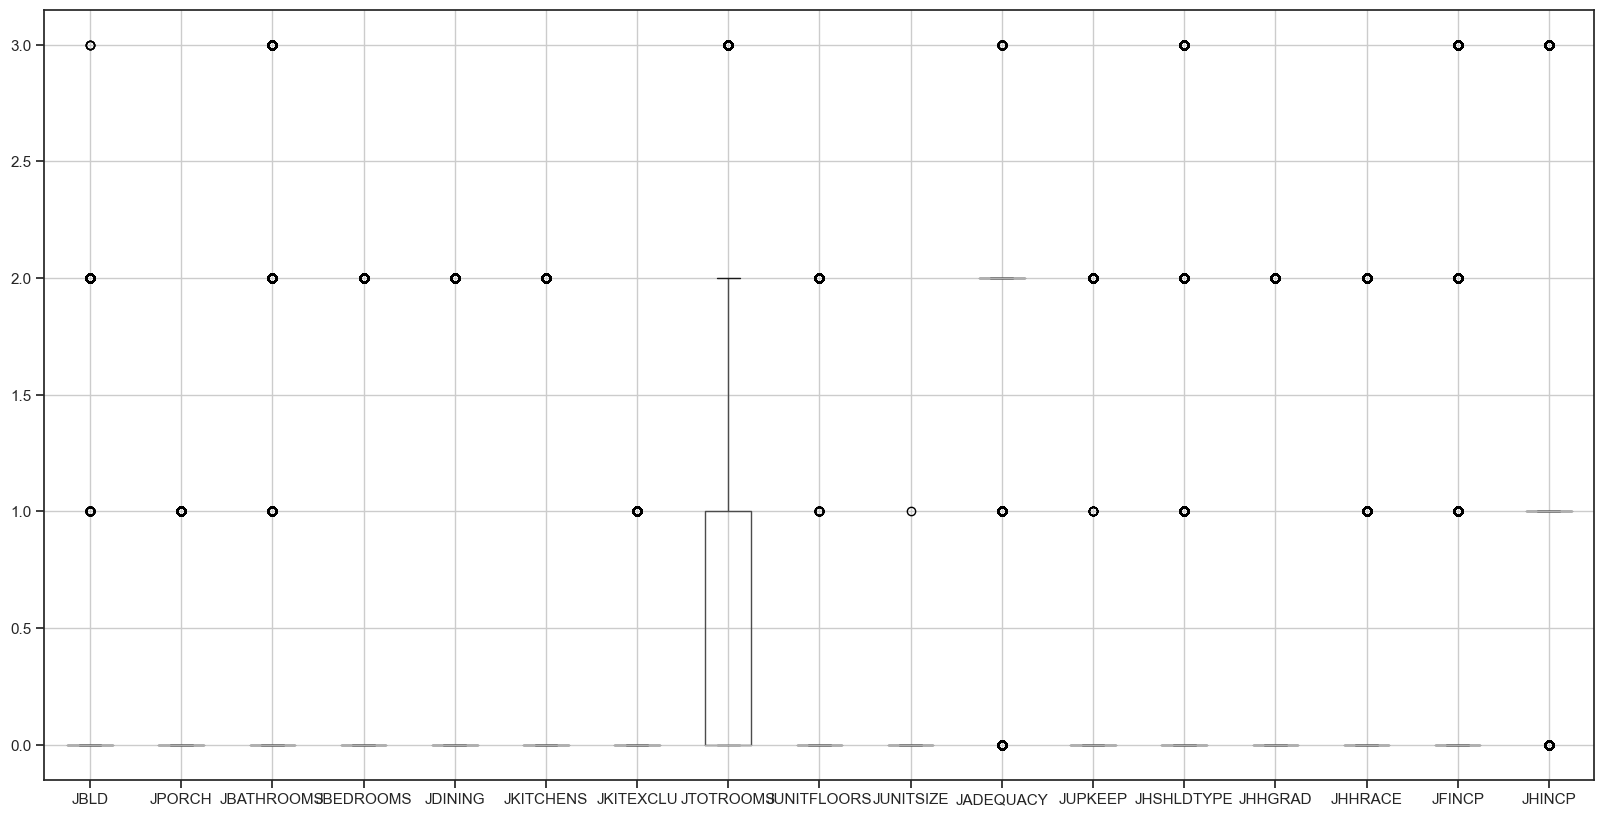

In [57]:
#Create box plots for outliers for all columns in dataframe
var15.boxplot(figsize=(20,10))
plt.show()

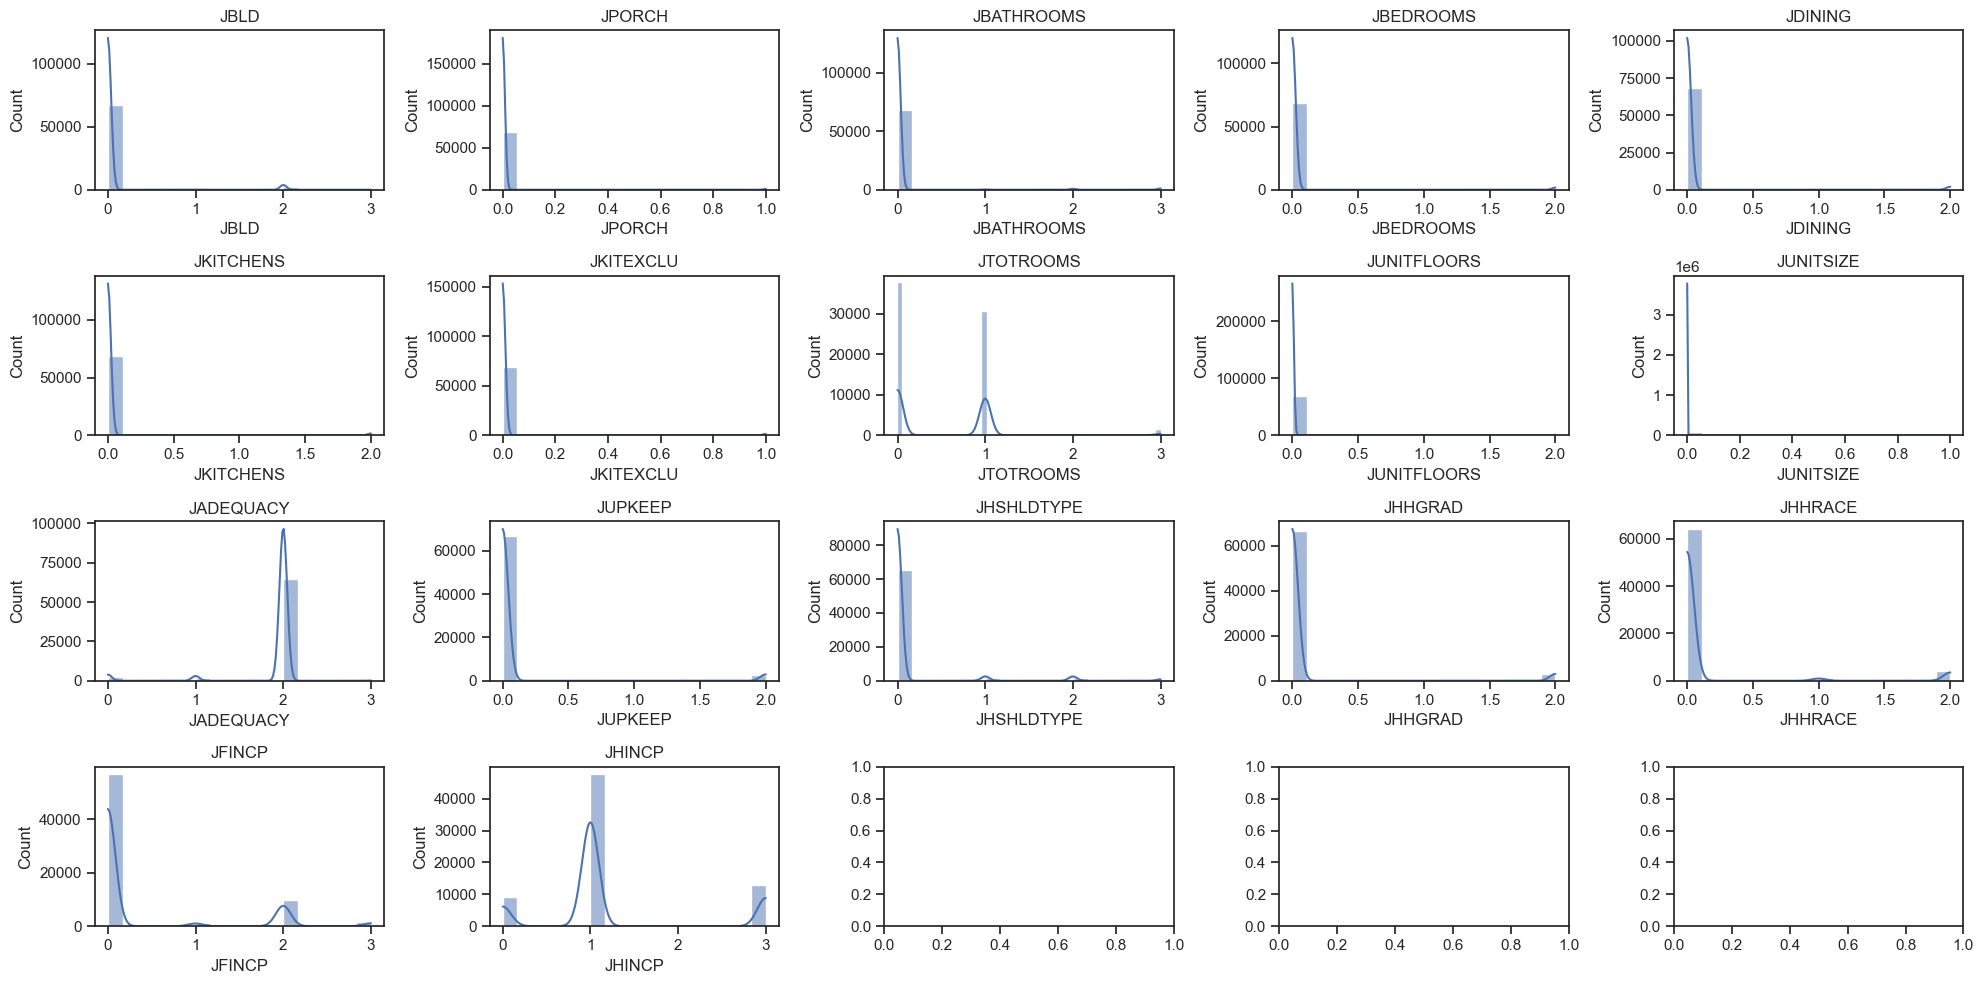

In [58]:
#Check standard deviation
num_rows = 4
num_cols = 5
variable_names = list(var15.columns)
num_figures = len(variable_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

for i, var_name in enumerate(variable_names):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.histplot(data=var15[var_name], ax=ax, kde=True)
    ax.set_title(var_name)

plt.tight_layout()
plt.show()

/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_90868/3769997653.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=var15['JHINCP'], shade=True)


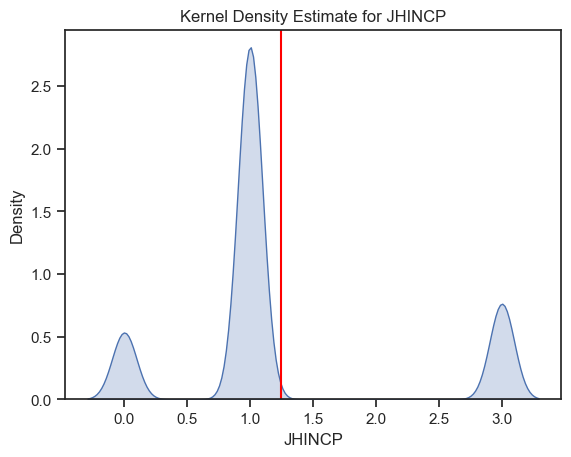

In [59]:
#Check smoothing for probability density estimation for specific values and its mean
sns.kdeplot(data=var15['JHINCP'], shade=True)
mean_value = var15['JHINCP'].mean()
plt.axvline(x=mean_value, color='red')
plt.title(f"Kernel Density Estimate for {var_name}")
plt.show()

#### Preprocessing of data
To verify that variables are on the same scale, standardize the dataset. This is crucial for algorithms for hierarchical and distance-based grouping--> K-means.

In [60]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(var15)

Using the elbow method, which plots the inertia for different k-values and shows the "elbow point", we will see why using 3 clusters is optimal

/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

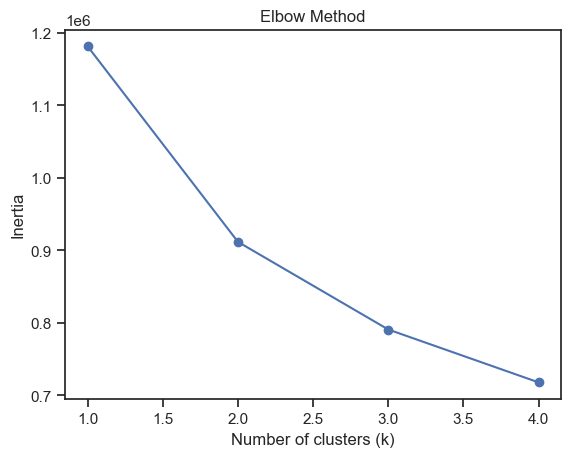

In [61]:
inertia = []
k_values = list(range(1, 5))
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [62]:
k = 3 
kmeans = KMeans(init="random",n_clusters=k,n_init=10,max_iter=300, random_state=42)
kmeans_clusters = kmeans.fit_predict(data_scaled)

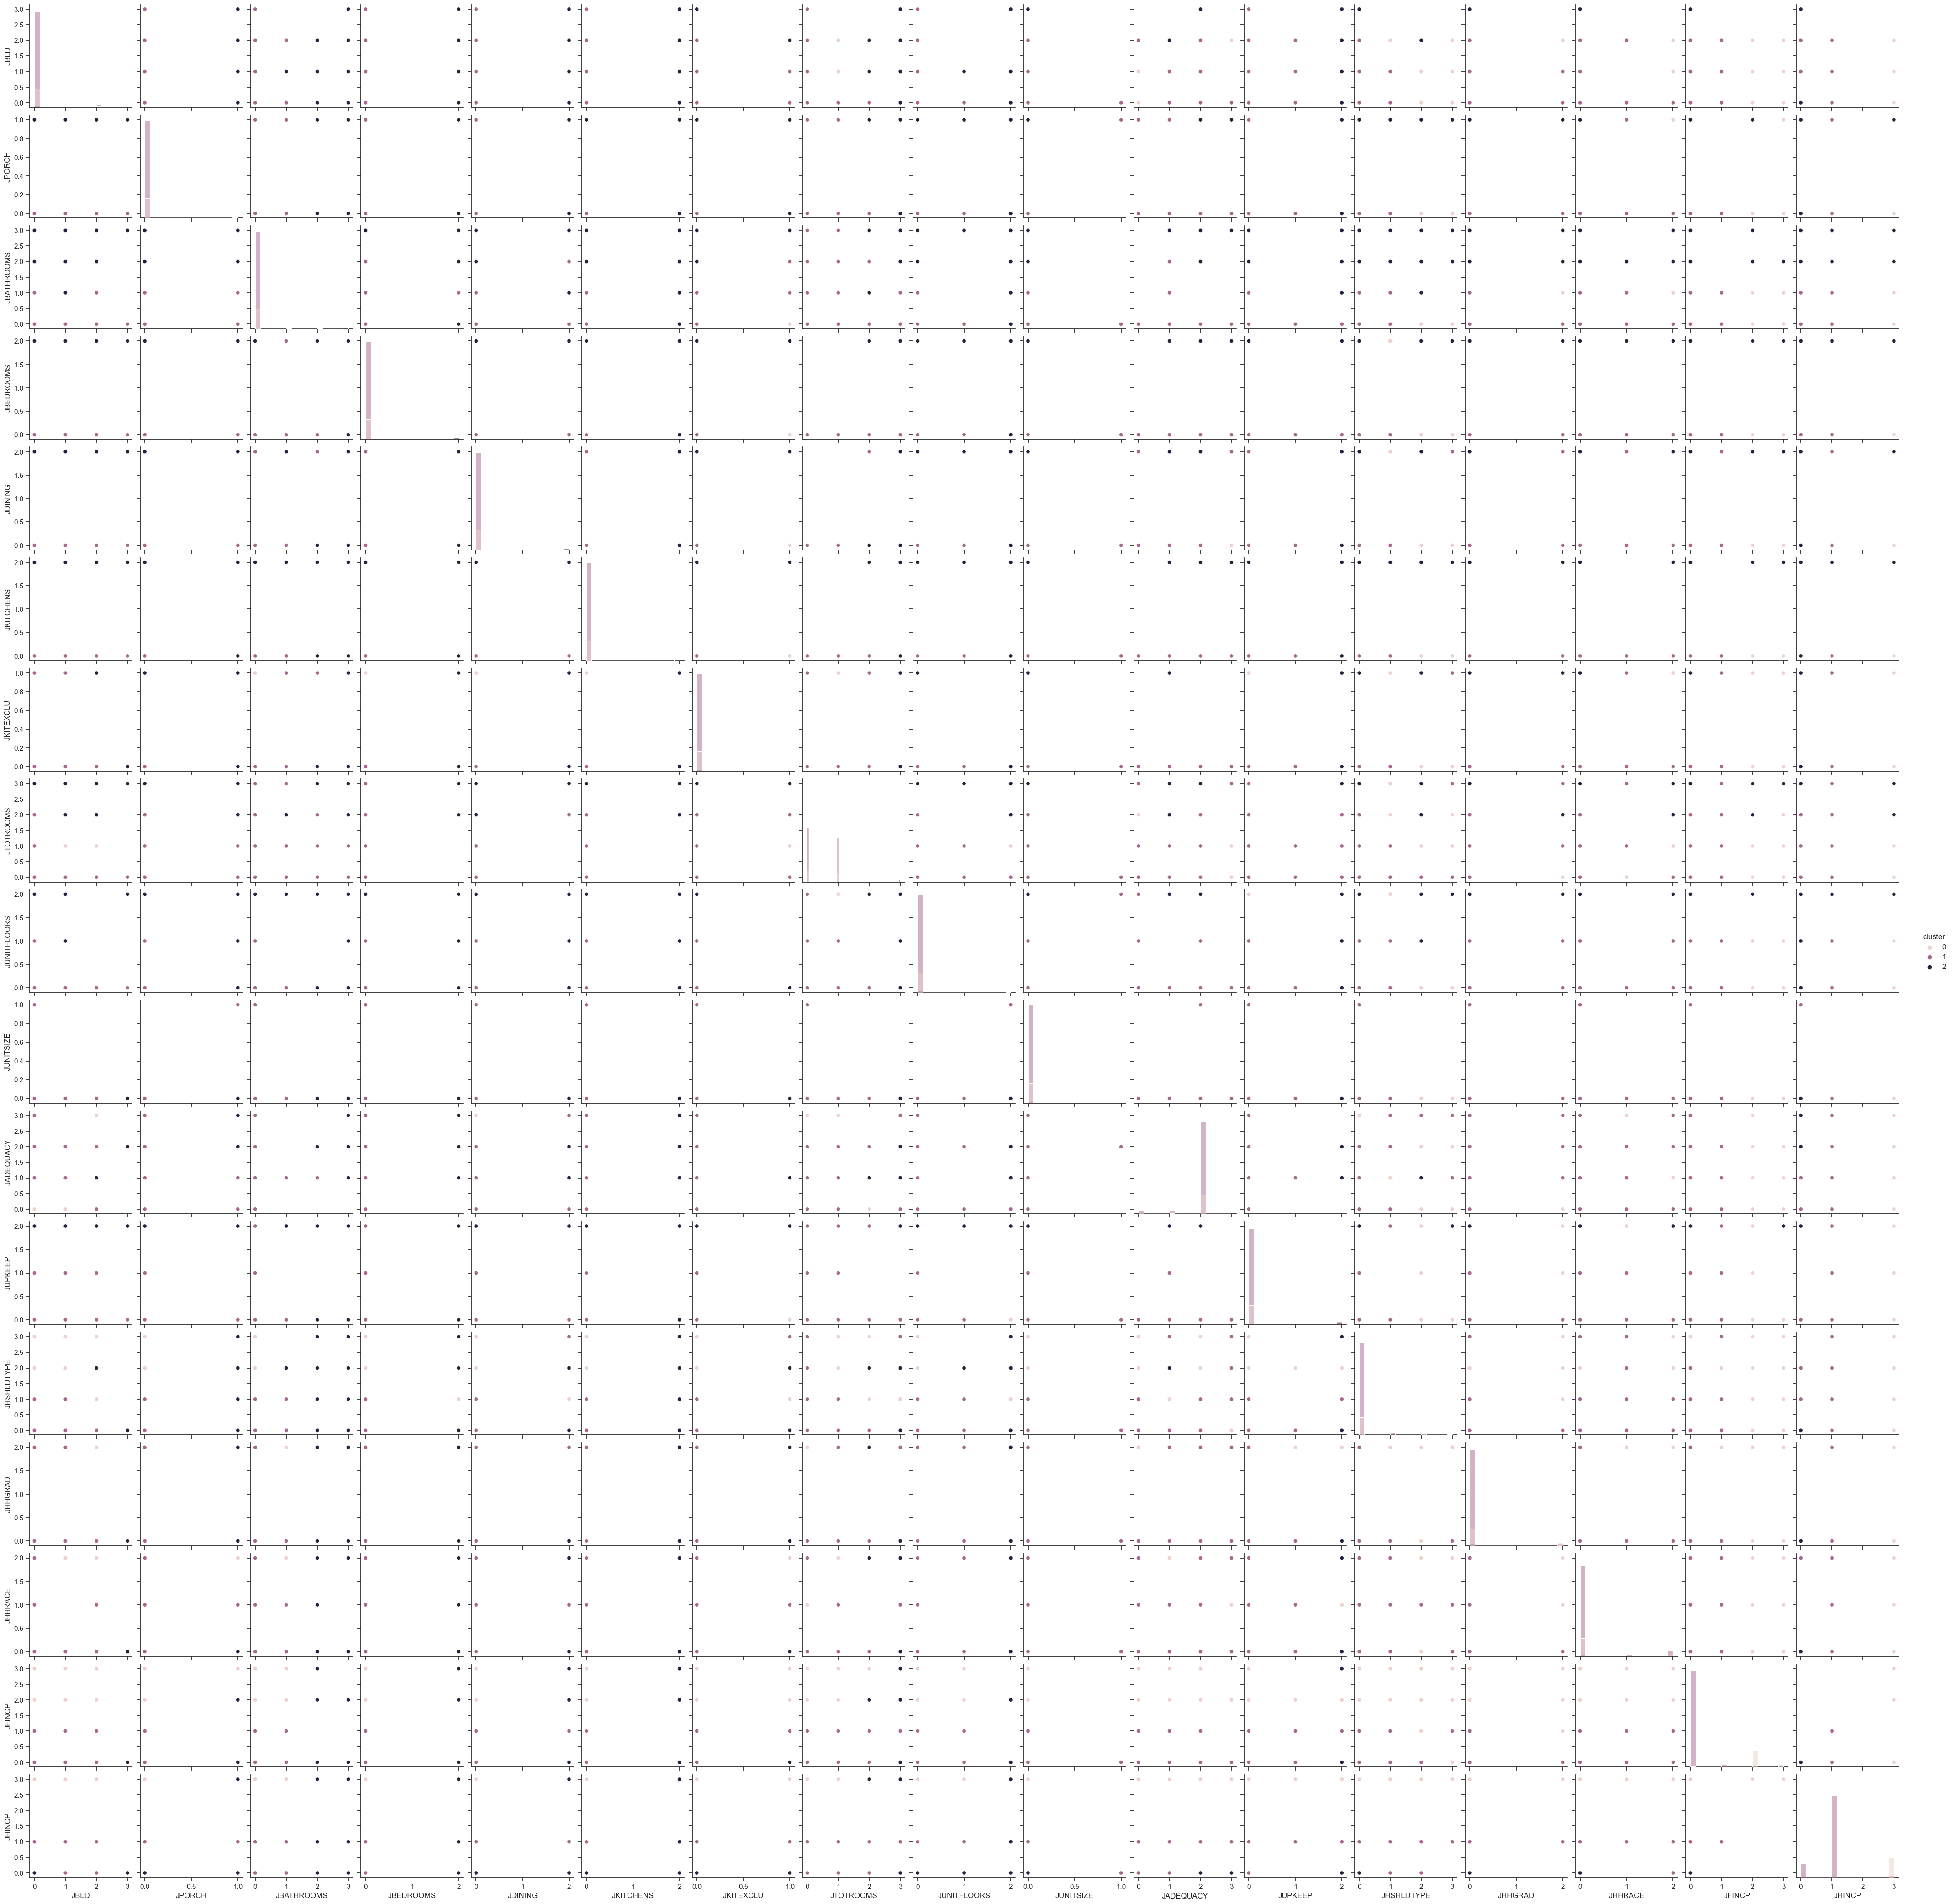

In [35]:
#Add the cluster labels to var15 and plot them against each variable
var15_clustered = var15.copy()
var15_clustered['cluster'] = kmeans_clusters
sns.pairplot(var15_clustered, hue='cluster', diag_kind='hist')
plt.show()

K-means Silhouette Score: 0.4671325141082854


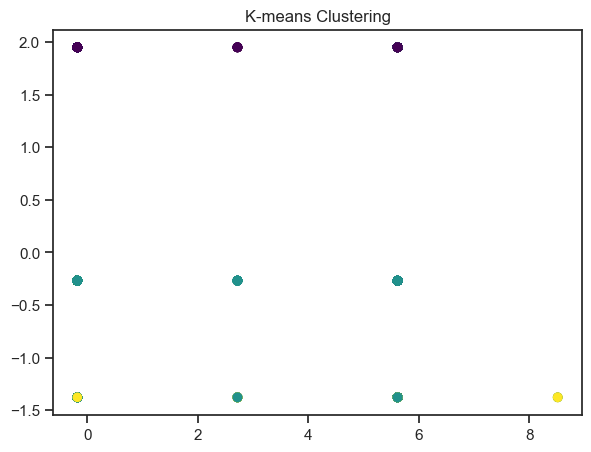

In [63]:
#Silhouette scores
kmeans_silhouette = silhouette_score(data_scaled, kmeans_clusters)
print(f"K-means Silhouette Score: {kmeans_silhouette}")
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_scaled[:, 0], data_scaled[:, 16], c=kmeans_clusters, cmap='viridis')
plt.title('K-means Clustering')
plt.show()

In [68]:
#Count of classes
var15_clustered['cluster'].value_counts()

1    56875
3    11543
2     1075
Name: cluster, dtype: int64

In [69]:
#determine what cluster represents each social class by checking the mean family income
mean_income = var15_clustered.groupby('cluster')['JHINCP'].mean()
print(mean_income)

cluster
1    0.903051
2    0.300465
3    2.997401
Name: JHINCP, dtype: float64


In [ ]:
var15_clustered['cluster'] = var15_clustered['cluster'].replace({0:1, 1:2, 2:3})
var15_clustered['cluster'].value_counts()

# Sexual harrassment
There are 368,921 female victims of sexual harassment in 2015 in the US